# Simple Linear Regression

## Importing Relevant Libraries

In [1]:
import numpy as np # it is meant for mathematical operations
import matplotlib.pyplot as plt # it is meant for nice graphs
from mpl_toolkits.mplot3d import Axes3D # for nice 3D graphs

## Generating Random Input data to train on

In [2]:
observations = 1000

# np.random.uniform function -> draws random value from interval(low,high),where each number has got equal chances for being selected. However, size=(number of observation X number of variables)
x=np.random.uniform(low=-10,high=10,size=(observations,1))
z=np.random.uniform(-10,10,(observations,1))

# from linear model inputs=(number of observations X number of variables) e.g inputs=(1000X2)
#np.column_stack function -> takes a sequence of 1D arrays and stack them into 2D arrays
inputs=np.column_stack((x,z))

#printing the shape of the inputs to check whether we are right
print(inputs.shape)

(1000, 2)


## Creating the targets we will aim at

In [3]:
#targets = f(x,z)= (weight1*x + weight2*z + bias(intercept) + noise) -> we introduce noise since real data contains noise
noise=np.random.uniform(-1,1,(observations,1))

targets= 2*x + 3*z + 5 + noise

print(targets.shape)

(1000, 1)


## Plotting the training data

### The point is to see that there is a strong trend that our model should learn to produce

In [4]:
#targets=targets.reshape(observations,1)
#fig=plt.figure()
#ax=fig.add_subplot(111,projection='3d')
#ax.plot(x, z, targets)
#ax.view(azim=90)
#plt.show()
#targets=targets.reshape(observations,1)

# Initialize variables

In [5]:
# initial weights and biases(scalar) will be randomly from the interval[-0.1,0.1]
init_range=0.1

weights=np.random.uniform(-init_range,init_range,size=(2,1))
biases=np.random.uniform(-init_range,init_range,size=1)

print(weights)
print(biases)

[[-0.07963021]
 [ 0.08204952]]
[0.08579553]


## Setting a Learning Rate (eta)

In [6]:
# Learning rate affects the speed of the optimization
learning_rate=0.02

## Train the model

### Obtaining the values of the average loss function - linear functions that will fit the model very well

In [7]:
# outputs = (inputs*weights + biases), we will use function np.dot(A,B)/A.dot(B) -> used for multiplying matrices
# delta records the difference between the outputs and targets. It is important for the update rule
# np.sum(a) function -> allows us to sum all the values in the arrays. The lower the loss the higher the accuracy
# np.dot function -> also means sum product
#inputs.T -> is a method used for transposing matrices
# by the end, the weights,biases and outputs should be able to contain the optimized values from the last iterations from the loop and therby becomes optimized

for i in range(100):
    outputs=np.dot(inputs,weights) + biases
    deltas=outputs - targets
    
    loss=np.sum(deltas**2)/2/observations #average loss (the number of loss per obsevation)
    
    print(loss)
    
    delta_scaled=deltas/observations
    
    weights=weights-learning_rate*np.dot(inputs.T,delta_scaled) #updating the weights (under optimization) following the gradient methodology
    biases=biases-learning_rate*np.sum(delta_scaled)#updating the biases (under optimization) following the gradient methodology
    

230.18607979851677
34.26670764769393
13.605836079182403
11.051762325408847
10.40641166863237
9.978317989894737
9.587800118639409
9.214975735746052
8.85713481166184
8.513461795288613
8.183371612288344
7.866324664314903
7.561805236203512
7.269318288228164
6.988388376293182
6.718558846713488
6.45939109006388
6.2104638277526565
5.971372427174622
5.741728243971713
5.52115799028865
5.30930312799143
5.105819285861629
4.91037569981914
4.722654675263386
4.542351070659035
4.369171801526785
4.202835364032975
4.043071377403587
3.8896201444188403
3.7422322292739647
3.6006680521199623
3.4646974996252706
3.3340995509252997
3.2086619183518326
3.0881807023582812
2.9724600600798747
2.861311886990019
2.7545555111353917
2.652017399452706
2.553530875689774
2.458935849472374
2.3680785560764757
2.280811306482865
2.1969922473078323
2.1164851302197576
2.0391590904666903
1.964888434155007
1.8935524339333036
1.825035132749441
1.7592251553617266
1.6960155272978679
1.6353035009673846
1.5769903886448509
1.520981402

## Printing the weights and biases and check whether we have worked correctly

In [8]:
# when the number of iterations is increased, the bias increases too 
print(weights,biases)

[[1.99997082]
 [2.99997276]] [4.34048952]


## Plotting last outputs vs targets

### Since they are the last ones at the end of training, they represent the final model accuracy. The closer this plot is to 45 degrees line, the closer the target and output values are.

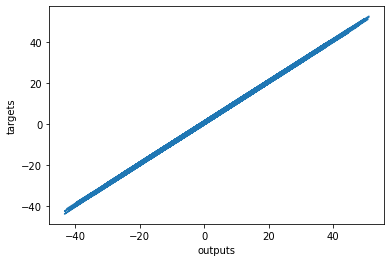

In [9]:
plt.plot(outputs,targets)
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()